## Loan Case study

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
import warnings
warnings.filterwarnings("ignore")

#### connecting notebookfile with input folder

In [2]:
%cd "C:\Users\hp\OneDrive\Desktop\Upgrad Jupyter files\UPGRAD CASE STUDY\loan"


C:\Users\hp\OneDrive\Desktop\Upgrad Jupyter files\UPGRAD CASE STUDY\loan


#### code to see all columns of dataset

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### reading loan data file

In [4]:
loan_df=pd.read_csv("loan.csv")
loan_df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                         0.0                          NaN   
1             Sep-13                         0.0                          NaN   
2             May-16                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN              

#### Checking shape of the dataframe

In [5]:
loan_df.shape

(39717, 111)

#### Checking length of dataframe

In [6]:
len(loan_df)

39717

#### Checking total null values in each column

In [7]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Filtering columns having all null values

In [8]:
Column_all_null=loan_df.columns[loan_df.isnull().sum()==len(loan_df)]
Column_all_null

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [9]:
Column_all_null.shape

(54,)

#### remove these columns and checking shape now

In [10]:
loan_df=loan_df.drop(Column_all_null, axis=1)

#### getting total null values for each column aftre removing null columns

In [11]:
loan_df.shape

(39717, 57)

In [12]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Getting the columns names who is having null values more than 75%

In [13]:
# min_count =  int(((100-75)/100)*loan_df.shape[0] + 1)
# print(min_count)
# loan_df = loan_df.dropna( axis=1, thresh=min_count)
# loan_df.shape

#### Few more columns where around 90% values are null. So we are going to drop them.

In [14]:
loan_df=loan_df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)

#### checking shape after removing these columns

In [15]:
loan_df.shape

(39717, 53)

In [16]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [17]:
loan_df["emp_title"].value_counts()

US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
United States Air Force                               

#### Since emp_title and title are Job title provided by borrower. So we can drop these columns.

In [18]:
loan_df=loan_df.drop(['emp_title','title'],axis=1)

In [19]:
loan_df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Emp_length could be a important column so we impute null value with 0

In [20]:
loan_df["emp_length"].fillna('0',inplace=True)

In [21]:
loan_df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies          697
last_pymnt_d                   71
chargeoff_within_12_mths       56
collections_12_mths_ex_med     56
revol_util                     50
tax_liens                      39
last_credit_pull_d              2
total_rec_int                   0
total_acc                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
collection_recovery_fee         0
total_rec_late_fee              0
recoveries                      0
pub_rec                         0
last_pymnt_amnt                 0
policy_code                     0
application_type                0
acc_now_delinq                  0
delinq_amnt                     0
revol_bal                       0
id                              0
member_id                       0
annual_inc                      0
loan_amnt                       0
funded_amnt   

In [22]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### maximum count for pub_rec_bankruptcies is 0.0 so we can replace null value with 0.0

In [23]:
loan_df['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

In [24]:
loan_df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Apr-16     220
Mar-16     216
Oct-10     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Dec-15     176
Sep-10     176
Feb-16    

In [25]:
loan_df.isnull().sum().sort_values(ascending=False)

last_pymnt_d                  71
chargeoff_within_12_mths      56
collections_12_mths_ex_med    56
revol_util                    50
tax_liens                     39
last_credit_pull_d             2
total_rec_int                  0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
collection_recovery_fee        0
total_rec_late_fee             0
recoveries                     0
pub_rec                        0
last_pymnt_amnt                0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
revol_bal                      0
id                             0
member_id                      0
annual_inc                     0
loan_amnt                      0
funded_amnt                    0
funded_amn

In [26]:
loan_df["last_credit_pull_d"].value_counts().idxmax()

'May-16'

In [27]:
loan_df["last_credit_pull_d"].fillna(loan_df["last_credit_pull_d"].value_counts().idxmax(),inplace=True)
loan_df["last_pymnt_d"].fillna(loan_df["last_pymnt_d"].value_counts().idxmax(),inplace=True)
loan_df['revol_util'].fillna(loan_df['revol_util'].value_counts().idxmax(),inplace=True)

In [28]:
loan_df.isnull().sum().sort_values(ascending=False)

chargeoff_within_12_mths      56
collections_12_mths_ex_med    56
tax_liens                     39
total_rec_late_fee             0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
collection_recovery_fee        0
recoveries                     0
pub_rec                        0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credit_pull_d             0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
revol_bal                      0
id                             0
member_id                      0
annual_inc                     0
loan_amnt                      0
funded_amnt                    0
funded_amn

In [29]:
loan_df['chargeoff_within_12_mths'].value_counts()
#so we can fill null value with 0.0

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [30]:
loan_df['chargeoff_within_12_mths'].fillna(0.0,inplace=True)

In [31]:
loan_df['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [32]:
loan_df['collections_12_mths_ex_med'].fillna(0.0,inplace=True)

In [33]:
loan_df['revol_util'].value_counts()

0%        1027
0.20%       63
63%         62
40.70%      58
66.70%      58
0.10%       58
31.20%      57
61%         57
46.40%      57
66.60%      57
65.90%      56
70.40%      56
57.40%      55
49.80%      55
48.90%      55
25.50%      55
37.60%      55
64.80%      55
27.20%      54
89.50%      54
35.30%      54
46.60%      54
51.10%      54
32%         54
76.60%      54
68.60%      54
78.70%      54
75.50%      54
64.60%      54
51.60%      54
72.10%      53
62.80%      53
54.30%      53
45.60%      53
55.80%      53
48.20%      53
47.80%      53
68.70%      53
33.70%      53
70.80%      53
34.40%      53
41%         53
70.10%      52
66.90%      52
55.10%      52
53.90%      52
51.50%      52
48%         52
41.60%      52
29.10%      52
70.30%      52
55.50%      52
74.90%      52
36.50%      52
40.20%      51
58.70%      51
41.40%      51
49.10%      51
89.90%      51
43.40%      51
30.90%      51
54.10%      51
35.70%      51
45.90%      51
88%         51
66.10%      51
49.60%    

In [34]:
loan_df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [35]:
loan_df['tax_liens'].fillna(0.0,inplace=True)

In [36]:
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [37]:
loan_df=loan_df.drop('url',axis=1)

In [38]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                      

In [39]:
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [40]:
loan_df.isnull().sum().sort_values(ascending=False)

id                            0
recoveries                    0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
collection_recovery_fee       0
member_id                     0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term    

In [41]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                      

In [42]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [43]:
loan_df.shape

(39717, 50)

In [44]:
loan_df["id"].is_unique

True

In [45]:
loan_df["member_id"].is_unique

True

#### Since both id and member_id have unique values so we can remove any one of them

In [46]:
loan_df=loan_df.drop(['member_id'],axis=1)

In [47]:
loan_df.shape

(39717, 49)

In [48]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   charge

In [49]:
loan_df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [50]:
# loan_df.to_excel("output.xlsx")

#### As per data dict for emp_lenght column 0 means less than one year and 10 means ten or more years. So need to discuss on it

In [51]:
loan_df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0            1075
Name: emp_length, dtype: int64

In [52]:
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("+")[0])
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("years")[0])
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("year")[0])

In [53]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [54]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2         10           RENT     24000.0   
1        59.83     C        C4       < 1            RENT     30000.0   
2        84.33     C        C5         10           RENT     12252.0   
3       339.31     C        C1         10           RENT     49200.0   
4        67.79     B        B5         1            RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   charge

#### writing int_rate in float format

In [55]:
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x:0 if x=="0" else float(str(x).split("%")[0]))

#### writing integer part only in term

In [56]:
loan_df["term"] = loan_df["term"].apply(lambda x:0 if x=="0" else int(str(x).split("months")[0]))

#### removing % in revol_util

In [57]:
loan_df["revol_util"] = loan_df["revol_util"].apply(lambda x:0 if x=="0" else float(str(x).split("%")[0]))

In [58]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2         10           RENT     24000.0   
1        59.83     C        C4       < 1            RENT     30000.0   
2        84.33     C        C5         10           RENT     12252.0   
3       339.31     C        C1         10           RENT     49200.0   
4        67.79     B        B5         1            RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0         3        0      13648        83.7          9                   f   
1         3        0       1687         9.4          4                   f   
2         2        0       2956        98.5         10                   f   
3        10        0       5598        21.0         37                   f   
4        15        0      27783        53.9         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  deli

#### Since zip code is not given completely so not required for analysis. removing this

In [59]:
loan_df=loan_df.drop('zip_code', axis=1)

In [60]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2         10           RENT     24000.0   
1        59.83     C        C4       < 1            RENT     30000.0   
2        84.33     C        C5         10           RENT     12252.0   
3       339.31     C        C1         10           RENT     49200.0   
4        67.79     B        B5         1            RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   
3         CA  20.00            0           Feb-96               1        10   
4         OR  17.94            0           Jan-96               0        15   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0        0      13648        83.7          9                   f       0.00   
1        0       1687         9.4          4                   f       0.00   
2        0       2956        98.5         10                   f       0.00   
3        0       5598        21.0         37                   f       0.00   
4        0      27783        53.9         38                   f     524.06   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0          

#### collection categotical columns in a list

In [61]:
cat_cols = ["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "application_type"]

Countplot of: grade


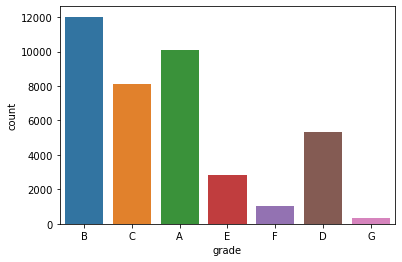

Countplot of: sub_grade


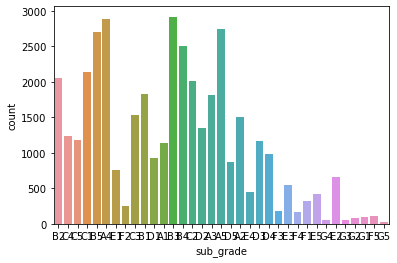

Countplot of: home_ownership


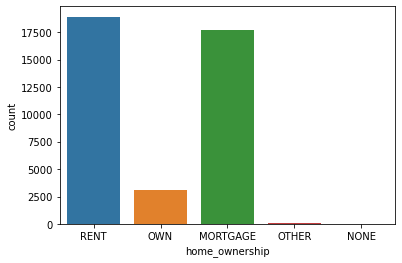

Countplot of: verification_status


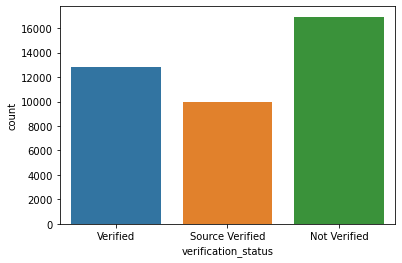

Countplot of: loan_status


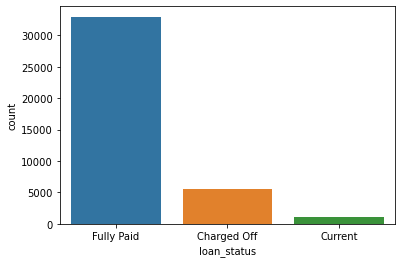

Countplot of: purpose


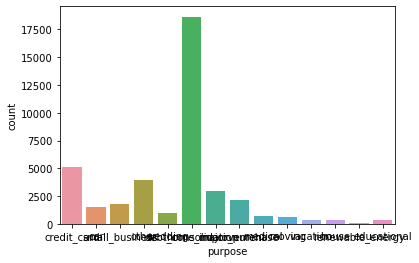

Countplot of: application_type


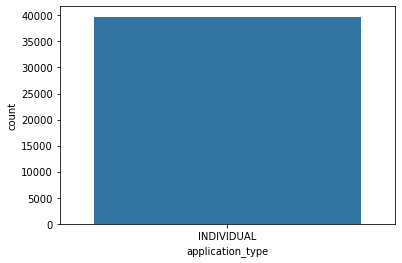

In [62]:
for i in cat_cols:
    print("Countplot of: " + i)
    sns.countplot(loan_df[i])
    plt.show()

#### boxplot between cat_cols and cont_cols

In [63]:
cont_cols = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "total_pymnt"]

Boxplot of: grade & loan_amnt


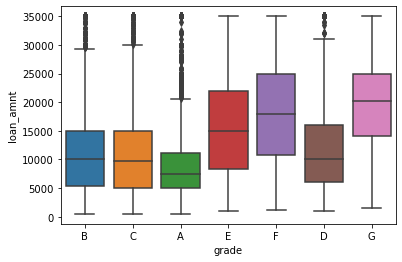

Boxplot of: grade & funded_amnt


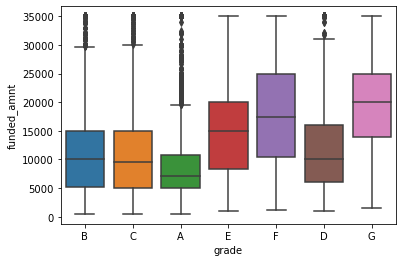

Boxplot of: grade & funded_amnt_inv


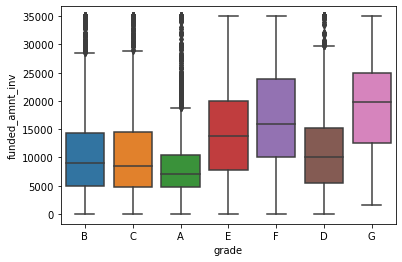

Boxplot of: grade & int_rate


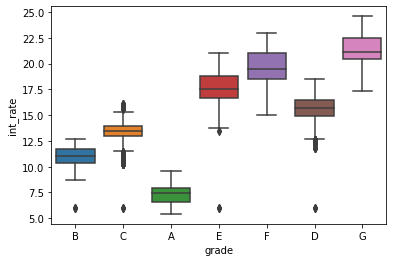

Boxplot of: grade & installment


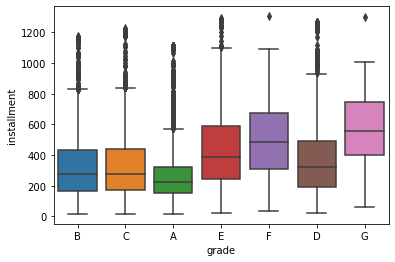

Boxplot of: grade & annual_inc


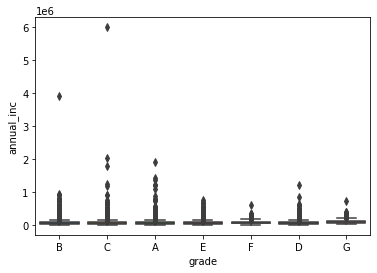

Boxplot of: grade & dti


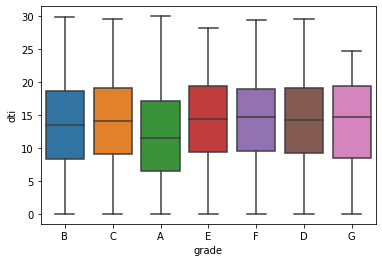

Boxplot of: grade & delinq_2yrs


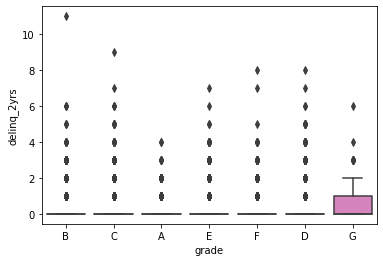

Boxplot of: grade & inq_last_6mths


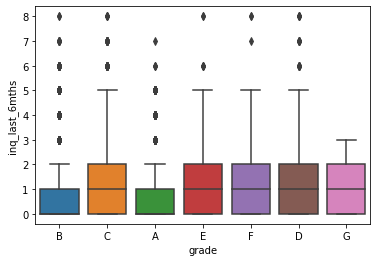

Boxplot of: grade & open_acc


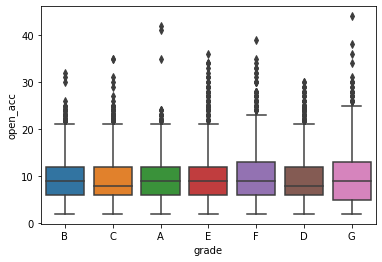

Boxplot of: grade & pub_rec


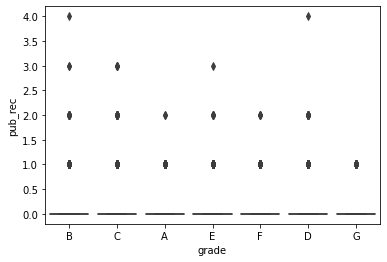

Boxplot of: grade & revol_bal


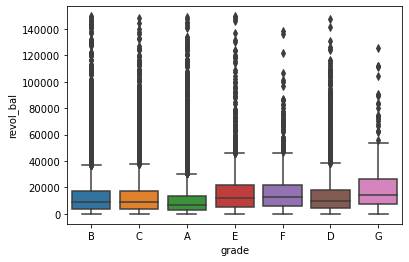

Boxplot of: grade & revol_util


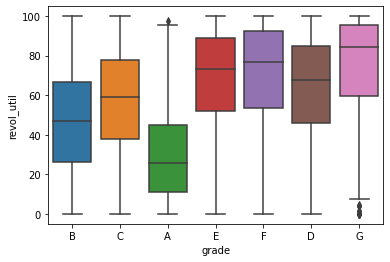

Boxplot of: grade & total_acc


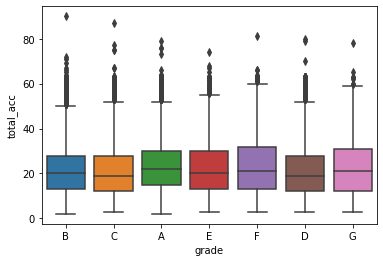

Boxplot of: grade & total_pymnt


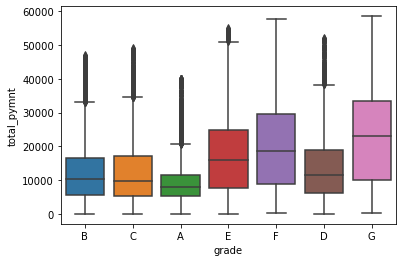

Boxplot of: sub_grade & loan_amnt


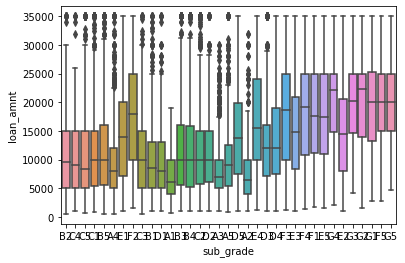

Boxplot of: sub_grade & funded_amnt


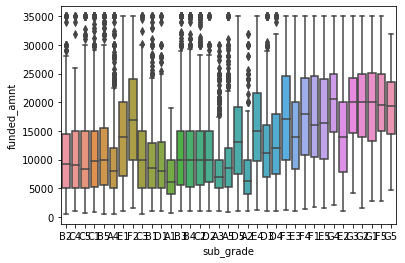

Boxplot of: sub_grade & funded_amnt_inv


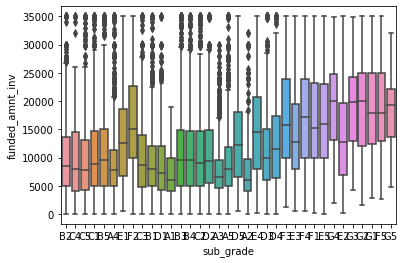

Boxplot of: sub_grade & int_rate


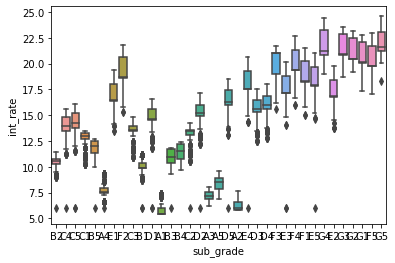

Boxplot of: sub_grade & installment


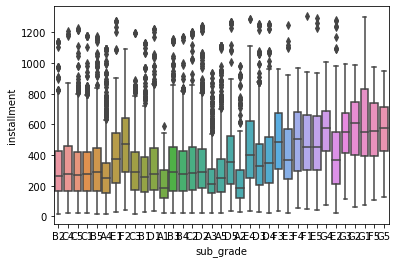

Boxplot of: sub_grade & annual_inc


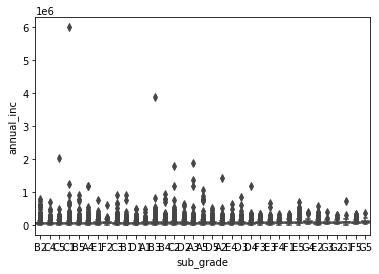

Boxplot of: sub_grade & dti


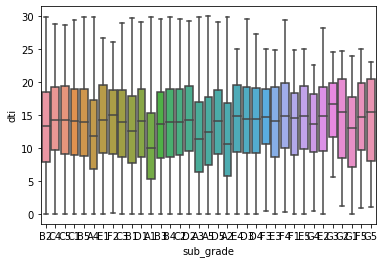

Boxplot of: sub_grade & delinq_2yrs


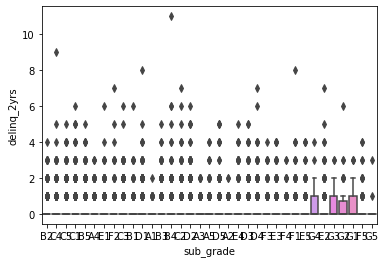

Boxplot of: sub_grade & inq_last_6mths


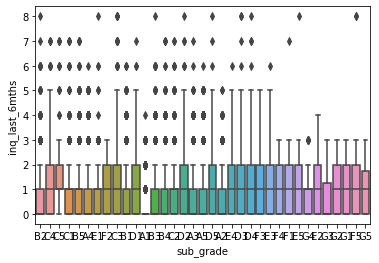

Boxplot of: sub_grade & open_acc


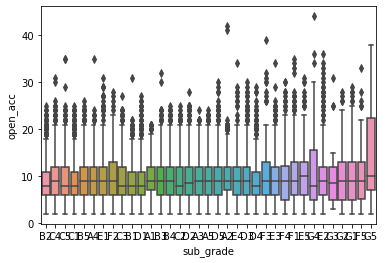

Boxplot of: sub_grade & pub_rec


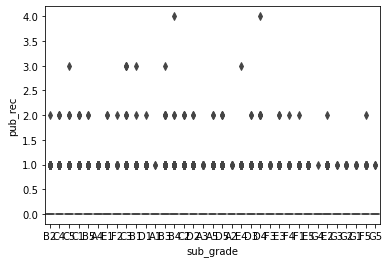

Boxplot of: sub_grade & revol_bal


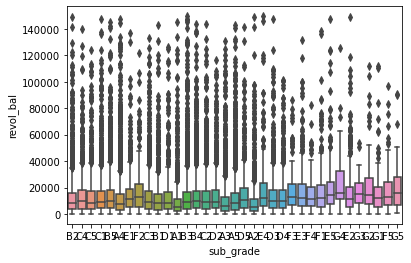

Boxplot of: sub_grade & revol_util


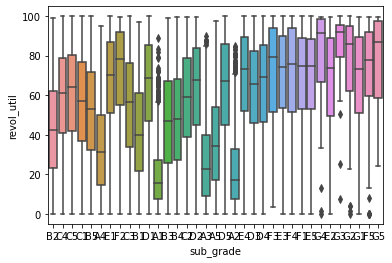

Boxplot of: sub_grade & total_acc


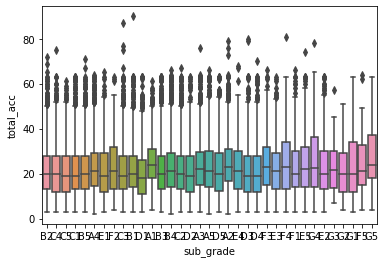

Boxplot of: sub_grade & total_pymnt


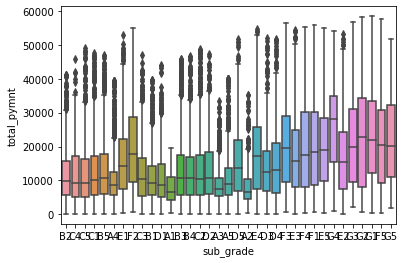

Boxplot of: home_ownership & loan_amnt


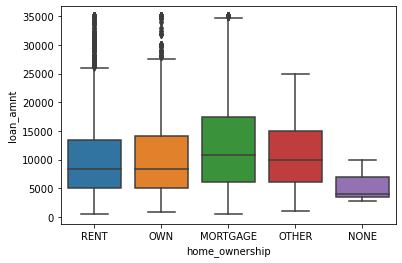

Boxplot of: home_ownership & funded_amnt


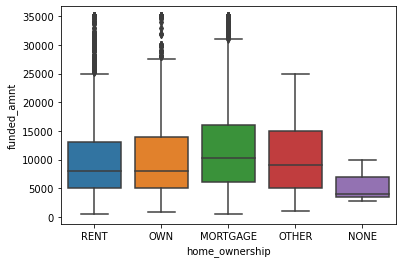

Boxplot of: home_ownership & funded_amnt_inv


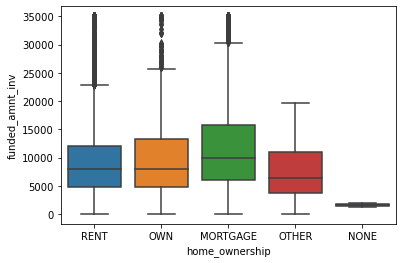

Boxplot of: home_ownership & int_rate


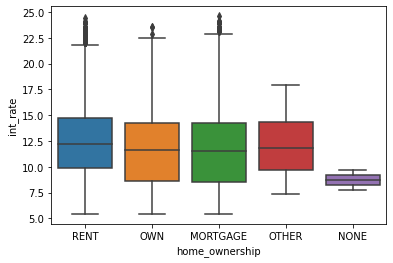

Boxplot of: home_ownership & installment


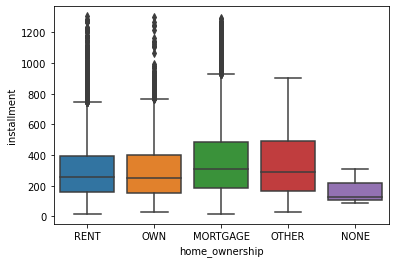

Boxplot of: home_ownership & annual_inc


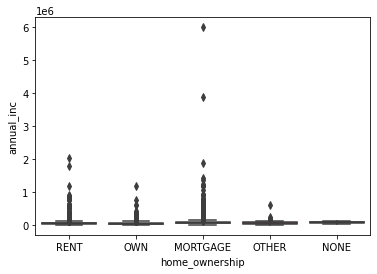

Boxplot of: home_ownership & dti


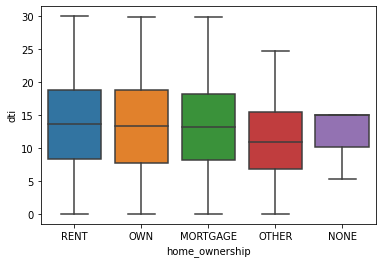

Boxplot of: home_ownership & delinq_2yrs


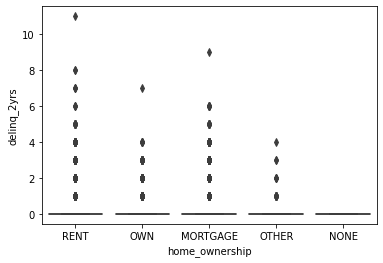

Boxplot of: home_ownership & inq_last_6mths


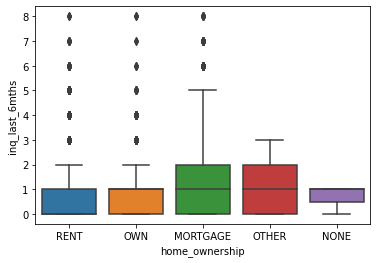

Boxplot of: home_ownership & open_acc


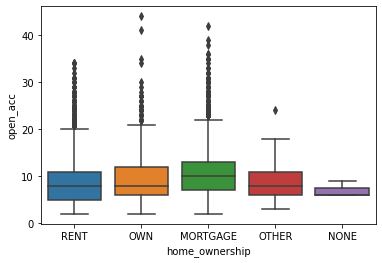

Boxplot of: home_ownership & pub_rec


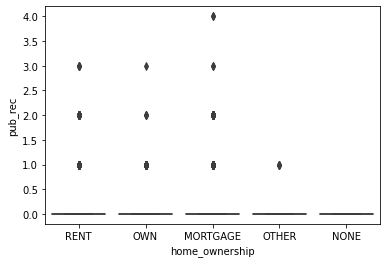

Boxplot of: home_ownership & revol_bal


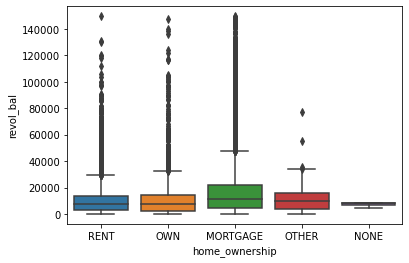

Boxplot of: home_ownership & revol_util


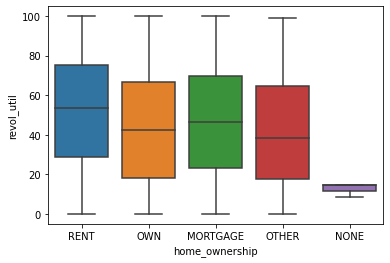

Boxplot of: home_ownership & total_acc


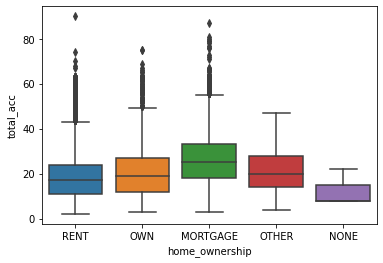

Boxplot of: home_ownership & total_pymnt


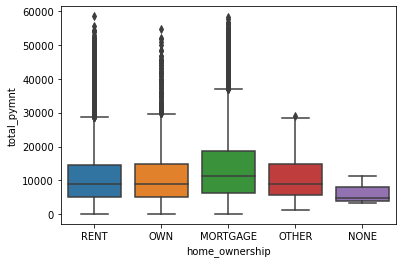

Boxplot of: verification_status & loan_amnt


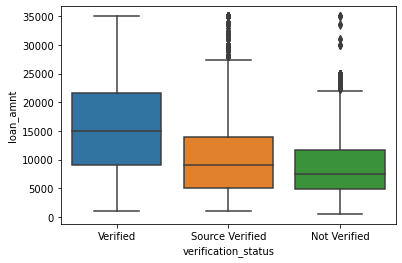

Boxplot of: verification_status & funded_amnt


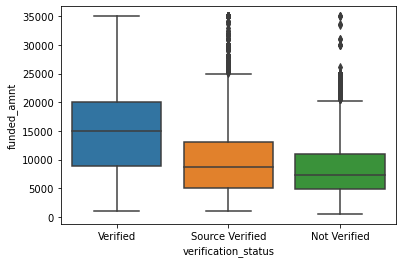

Boxplot of: verification_status & funded_amnt_inv


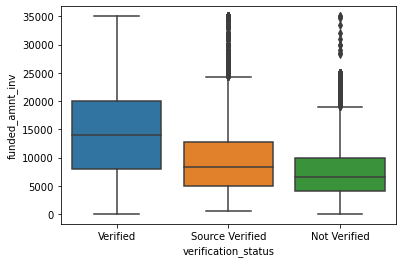

Boxplot of: verification_status & int_rate


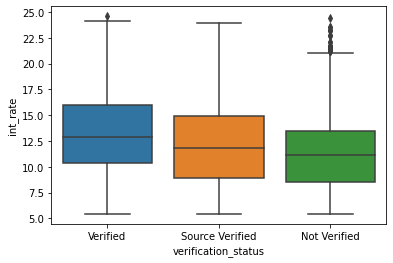

Boxplot of: verification_status & installment


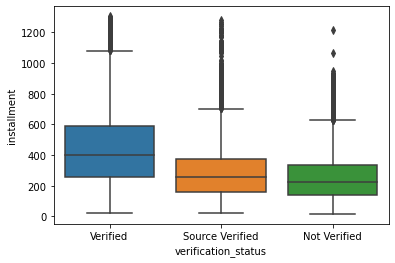

Boxplot of: verification_status & annual_inc


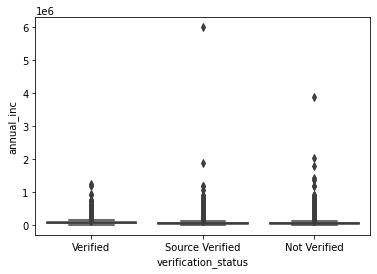

Boxplot of: verification_status & dti


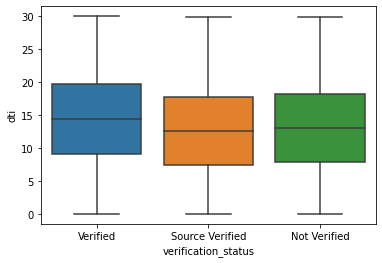

Boxplot of: verification_status & delinq_2yrs


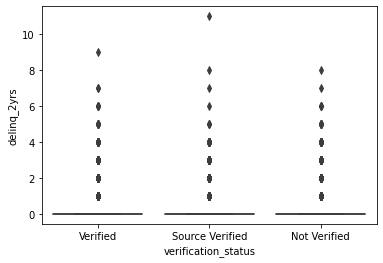

Boxplot of: verification_status & inq_last_6mths


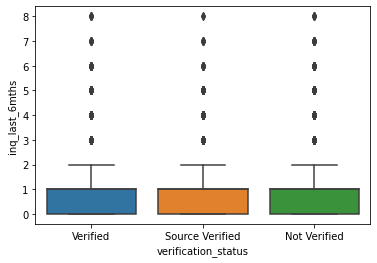

Boxplot of: verification_status & open_acc


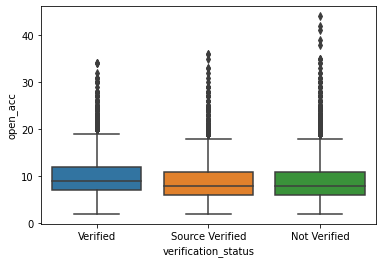

Boxplot of: verification_status & pub_rec


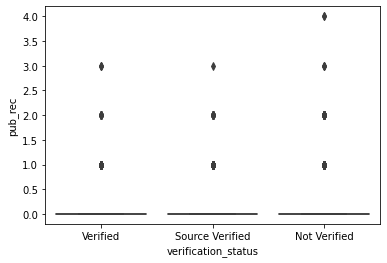

Boxplot of: verification_status & revol_bal


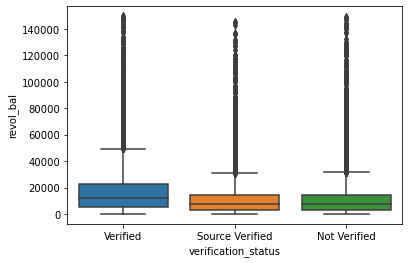

Boxplot of: verification_status & revol_util


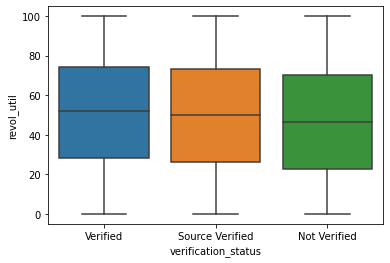

Boxplot of: verification_status & total_acc


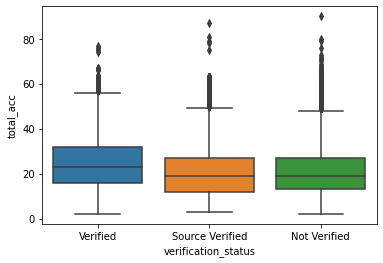

Boxplot of: verification_status & total_pymnt


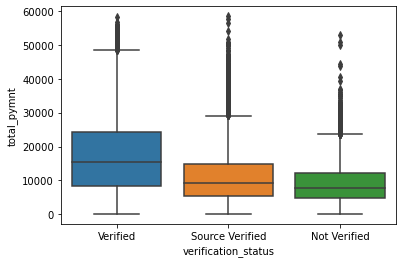

Boxplot of: loan_status & loan_amnt


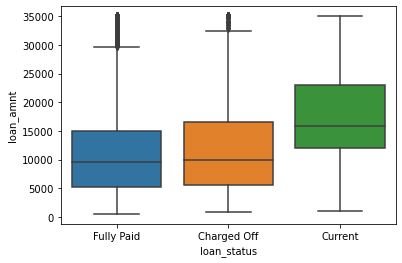

Boxplot of: loan_status & funded_amnt


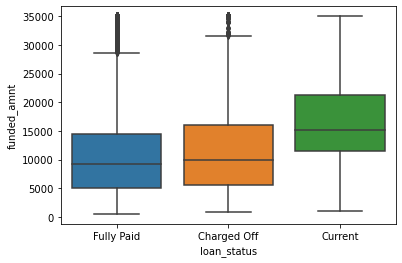

Boxplot of: loan_status & funded_amnt_inv


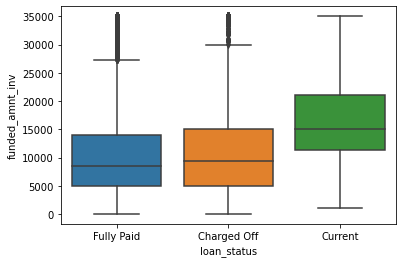

Boxplot of: loan_status & int_rate


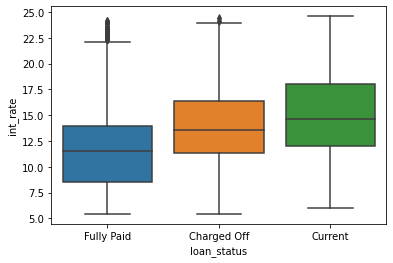

Boxplot of: loan_status & installment


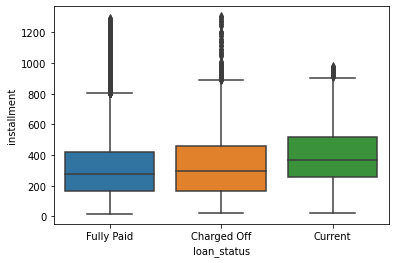

Boxplot of: loan_status & annual_inc


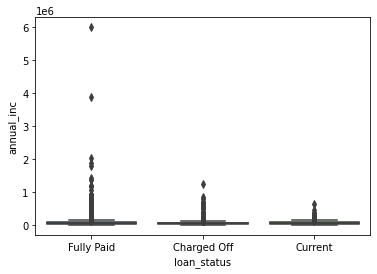

Boxplot of: loan_status & dti


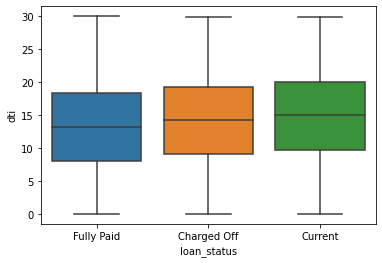

Boxplot of: loan_status & delinq_2yrs


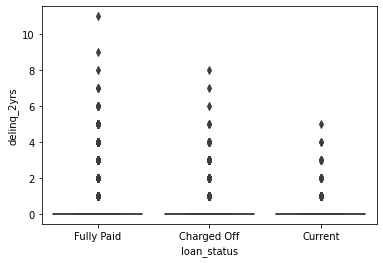

Boxplot of: loan_status & inq_last_6mths


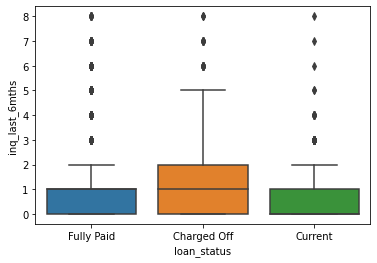

Boxplot of: loan_status & open_acc


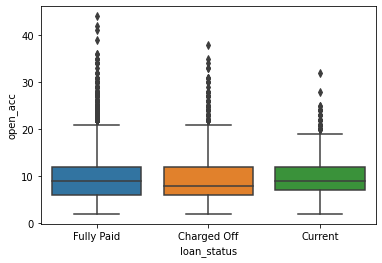

Boxplot of: loan_status & pub_rec


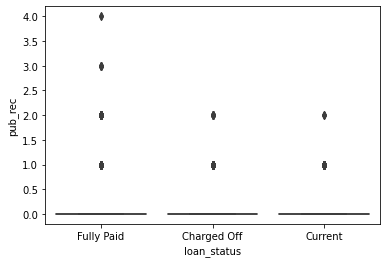

Boxplot of: loan_status & revol_bal


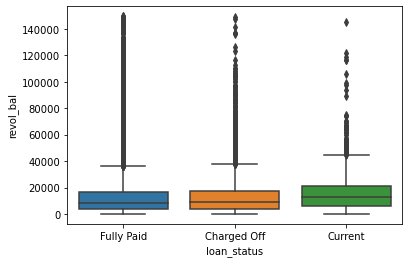

Boxplot of: loan_status & revol_util


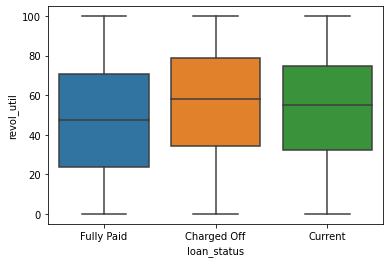

Boxplot of: loan_status & total_acc


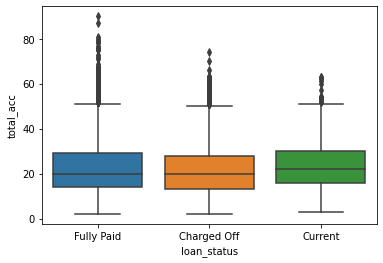

Boxplot of: loan_status & total_pymnt


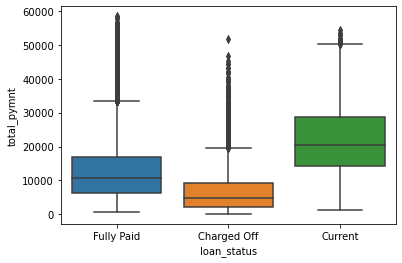

Boxplot of: purpose & loan_amnt


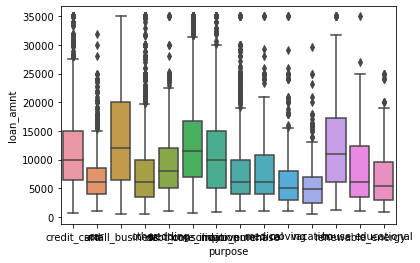

Boxplot of: purpose & funded_amnt


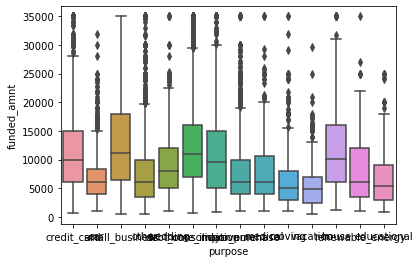

Boxplot of: purpose & funded_amnt_inv


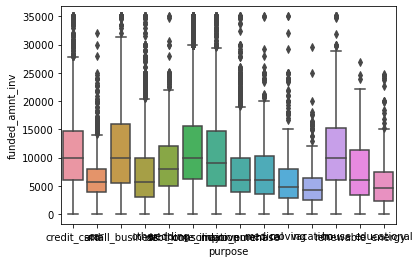

Boxplot of: purpose & int_rate


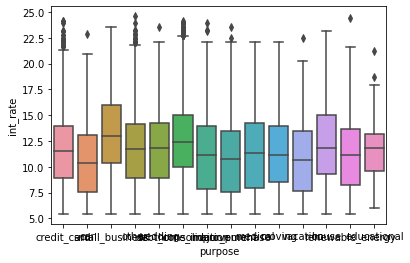

Boxplot of: purpose & installment


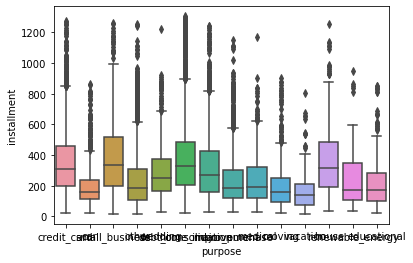

Boxplot of: purpose & annual_inc


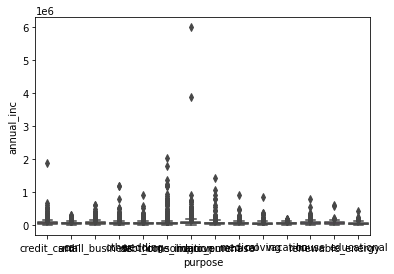

Boxplot of: purpose & dti


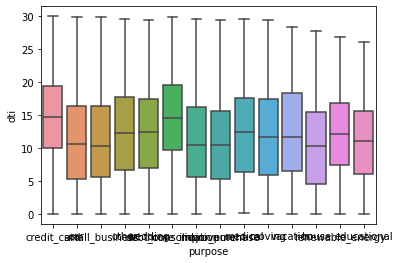

Boxplot of: purpose & delinq_2yrs


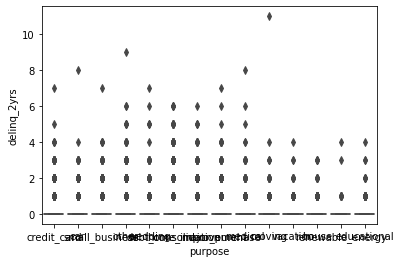

Boxplot of: purpose & inq_last_6mths


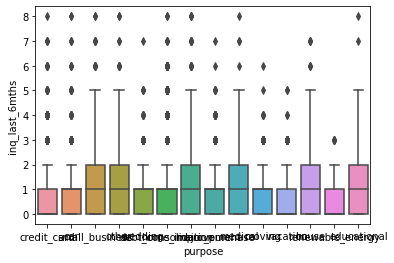

Boxplot of: purpose & open_acc


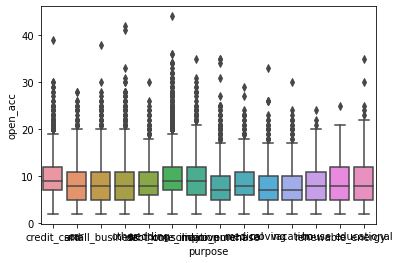

Boxplot of: purpose & pub_rec


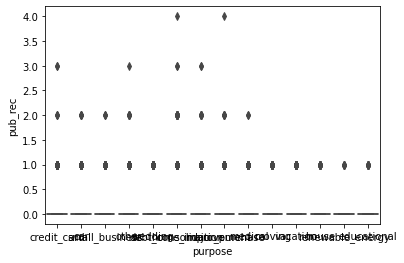

Boxplot of: purpose & revol_bal


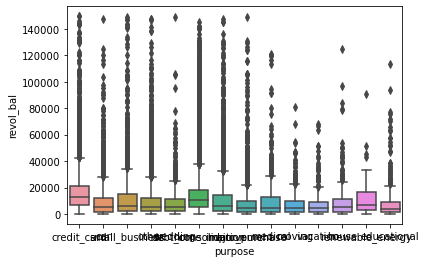

Boxplot of: purpose & revol_util


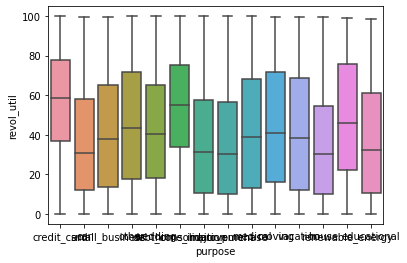

Boxplot of: purpose & total_acc


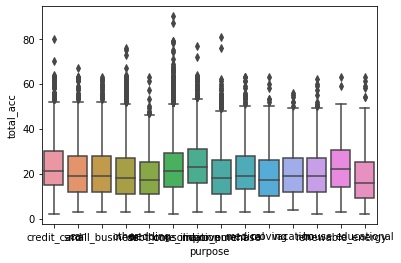

Boxplot of: purpose & total_pymnt


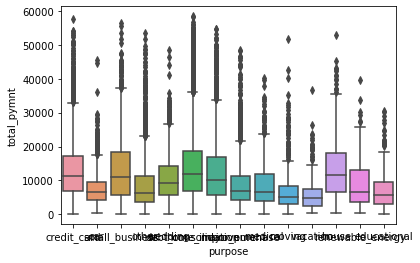

Boxplot of: application_type & loan_amnt


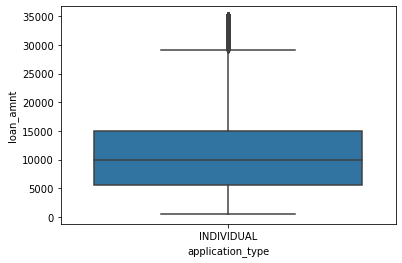

Boxplot of: application_type & funded_amnt


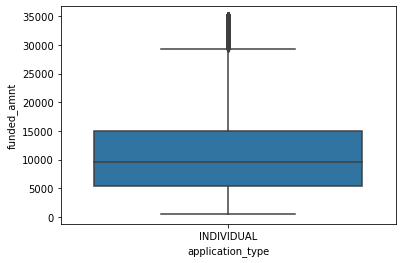

Boxplot of: application_type & funded_amnt_inv


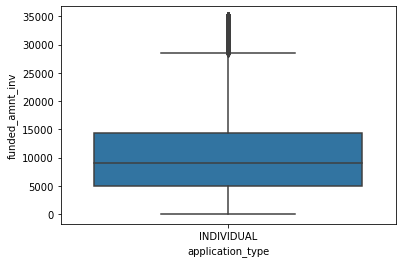

Boxplot of: application_type & int_rate


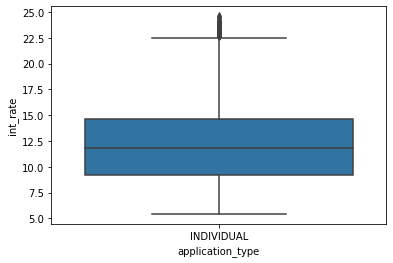

Boxplot of: application_type & installment


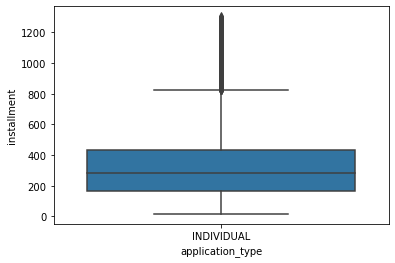

Boxplot of: application_type & annual_inc


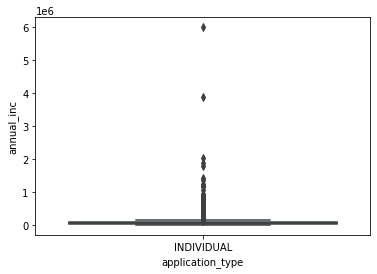

Boxplot of: application_type & dti


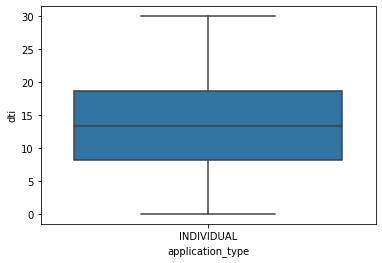

Boxplot of: application_type & delinq_2yrs


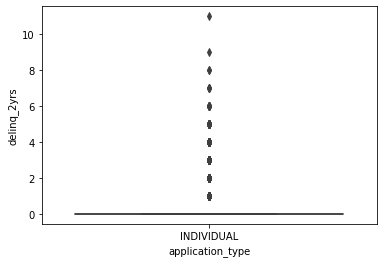

Boxplot of: application_type & inq_last_6mths


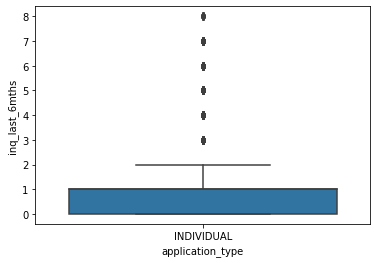

Boxplot of: application_type & open_acc


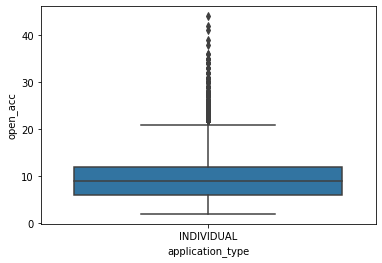

Boxplot of: application_type & pub_rec


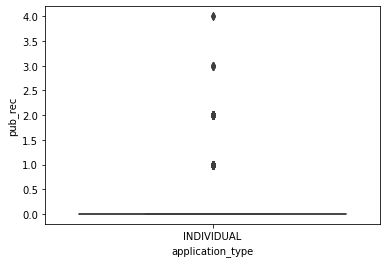

Boxplot of: application_type & revol_bal


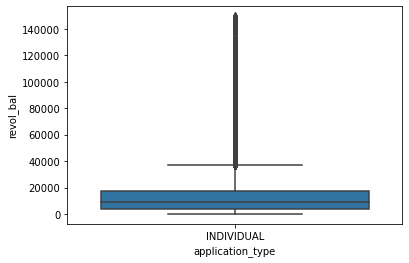

Boxplot of: application_type & revol_util


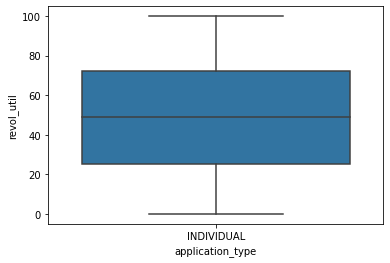

Boxplot of: application_type & total_acc


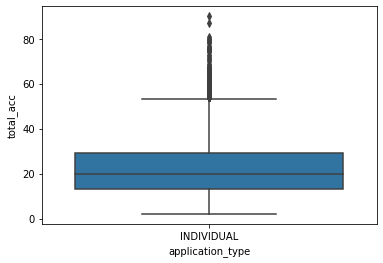

Boxplot of: application_type & total_pymnt


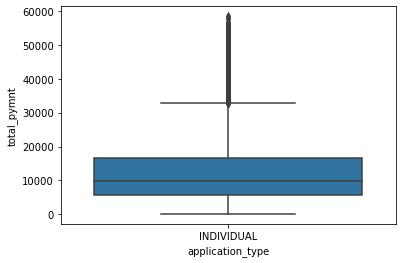

In [64]:
for i in cat_cols:
    for j in cont_cols:
        print("Boxplot of: "+i+" & "+j)
        sns.boxplot(loan_df[i], loan_df[j])
        plt.show()

#### collecting numeric columns in a list

#### plotting histograms for cat_cols

Histogram of: loan_amnt


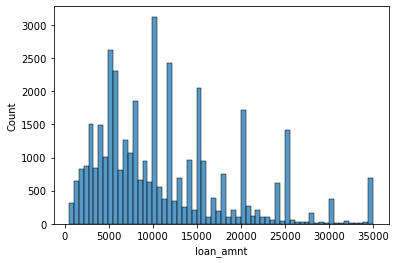

Histogram of: funded_amnt


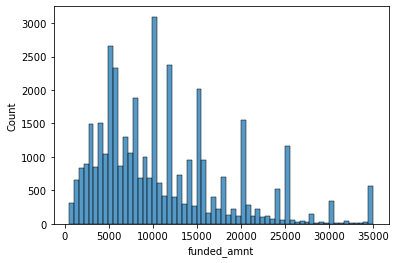

Histogram of: funded_amnt_inv


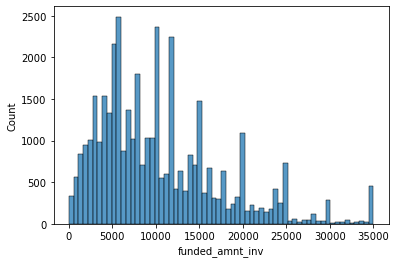

Histogram of: int_rate


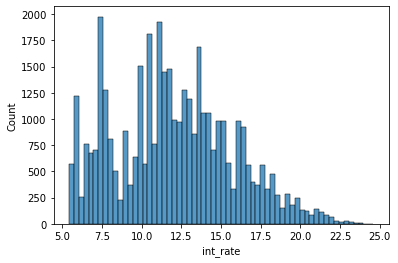

Histogram of: installment


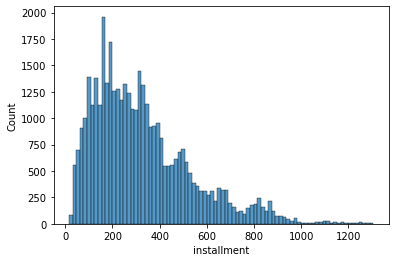

Histogram of: annual_inc


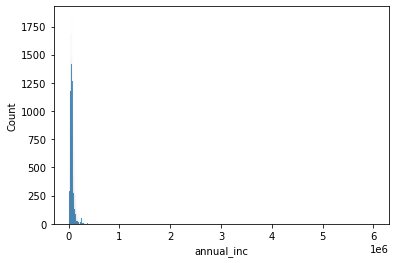

Histogram of: dti


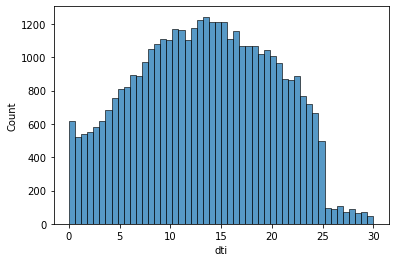

Histogram of: delinq_2yrs


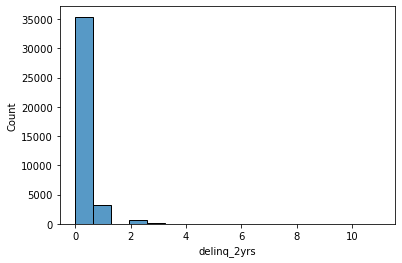

Histogram of: inq_last_6mths


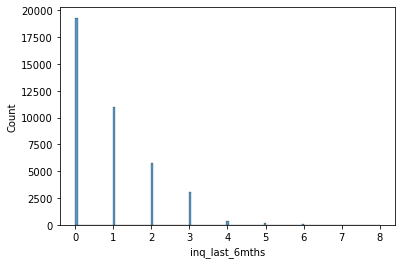

Histogram of: open_acc


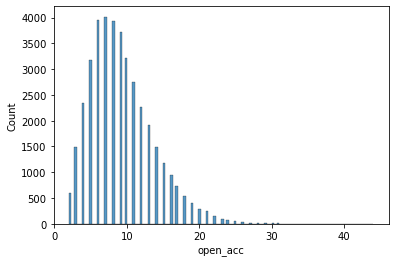

Histogram of: pub_rec


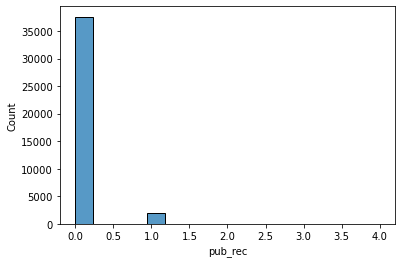

Histogram of: revol_bal


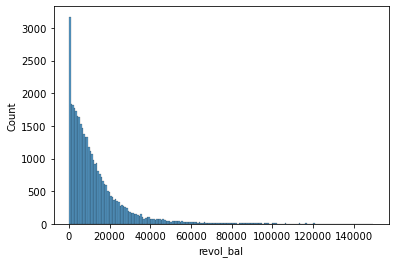

Histogram of: revol_util


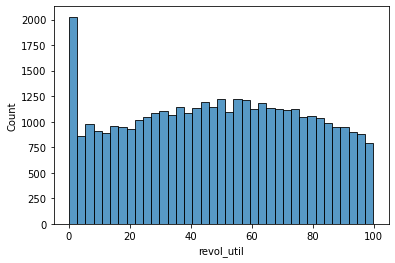

Histogram of: total_acc


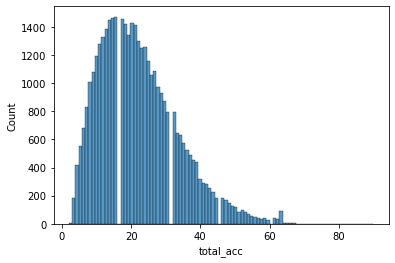

Histogram of: total_pymnt


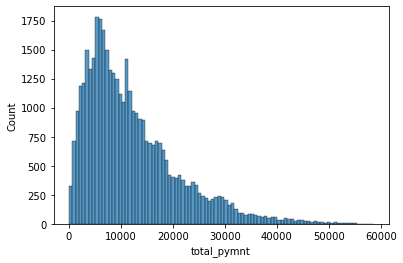

In [65]:
for i in cont_cols:
    print("Histogram of: " + i)
    sns.histplot(loan_df[i])
    plt.show()

In [66]:
loan_df["emp_length"].value_counts()

10      8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
0       1075
Name: emp_length, dtype: int64

In [67]:
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("< ")[-1])

In [68]:
loan_df["emp_length"].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [69]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Since id and pymnt_plan columns are not required for analysis so removing both

In [70]:
loan_df = loan_df.drop(['id','pymnt_plan'], axis=1)

In [71]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2         10           RENT     24000.0            Verified  Dec-11   
1        C4         1            RENT     30000.0     Source Verified  Dec-11   
2        C5         10           RENT     12252.0        Not Verified  Dec-11   
3        C1         10           RENT     49200.0     Source Verified  Dec-11   
4        B5         1            RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  delinq_2yrs  \
0   Fully Paid     credit_card         AZ  27.65            0   
1  Charged Off             car         GA   1.00            0   
2   Fully Paid  small_business         IL   8.72            0   
3   Fully Paid           other         CA  20.00            0   
4      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Jan-85               1         3        0      13648        83.7   
1           Apr-99               5         3        0       1687         9.4   
2           Nov-01               2         2        0       2956        98.5   
3           Feb-96               1        10        0       5598        21.0   
4           Jan-96               0        15        0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0          9                   f       0.00           0.00   5863.155187   
1          4                   f       0.00           0.00   1008.710000   
2         10                   f       0.00           0.00   3005.666844   
3         37                   f       0.00           0.00  12231.890000   
4         38                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0             May-16                         0.0            1   
1             Sep-13                         0.0            1   
2             May-16                         0.0            1   
3             Apr-16                         0.0            1   
4             May-16                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   
3       INDIVIDUAL               0                       0.0            0   
4       INDIVIDUAL               0            

In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  int64  
 4   int_rate                    39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  39717 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [73]:
# loan_df.to_excel("output.xlsx")

In [74]:
loan_df = loan_df.drop(['initial_list_status','policy_code', 'application_type',"collections_12_mths_ex_med",
                       "acc_now_delinq","chargeoff_within_12_mths","delinq_amnt",'pub_rec_bankruptcies','tax_liens'],axis=1)

In [75]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2         10           RENT     24000.0            Verified  Dec-11   
1        C4         1            RENT     30000.0     Source Verified  Dec-11   
2        C5         10           RENT     12252.0        Not Verified  Dec-11   
3        C1         10           RENT     49200.0     Source Verified  Dec-11   
4        B5         1            RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  delinq_2yrs  \
0   Fully Paid     credit_card         AZ  27.65            0   
1  Charged Off             car         GA   1.00            0   
2   Fully Paid  small_business         IL   8.72            0   
3   Fully Paid           other         CA  20.00            0   
4      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Jan-85               1         3        0      13648        83.7   
1           Apr-99               5         3        0       1687         9.4   
2           Nov-01               2         2        0       2956        98.5   
3           Feb-96               1        10        0       5598        21.0   
4           Jan-96               0        15        0      27783        53.9   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00   5863.155187          5833.84   
1          4       0.00           0.00   1008.710000          1008.71   
2         10       0.00           0.00   3005.666844          3005.67   
3         37       0.00           0.00  12231.890000         12231.89   
4         38     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  
0                     0.00       Jan-15           171.62             May-16  
1                     1.11       Apr-13           119.66             Sep-13  
2                     0.00       Jun-14           649.91             May-16  
3                     0.00       Jan-15           357.48             Apr-16  
4                     0.00       May-16            67.79             May-16

In [76]:
loan_df['emp_length']=loan_df['emp_length'].fillna(1)

In [77]:
loan_df['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [101]:
loan_df['emp_length']=loan_df['emp_length'].astype('int')
loan_df['emp_length'].dtypes

dtype('int32')

In [102]:
loan_df.shape

(39319, 39)

In [103]:
loan_df.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  39319.000000  39319.000000     39319.000000  39319.000000   
mean   11134.114550  10865.956662     10320.302968     42.408505   
std     7376.086312   7108.680268      7049.759305     10.617818   
min      500.000000    500.000000         0.000000     36.000000   
25%     5400.000000   5300.000000      5000.000000     36.000000   
50%    10000.000000   9600.000000      8900.000000     36.000000   
75%    15000.000000  15000.000000     14270.949420     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length     annual_inc           dti  \
count  39319.000000  39319.000000  39319.000000   39319.000000  39319.000000   
mean      12.006142    322.017733      4.944887   65524.215803     13.376622   
std        3.717367    206.206225      3.459141   35215.885297      6.663140   
min        5.420000     15.690000      0.000000    4000.000000      0.000000   
25%        9.250000    166.190000      2.000000   40000.000000      8.270000   
50%       11.830000    278.920000      4.000000   58000.000000     13.480000   
75%       14.540000    426.100000      9.000000   81000.000000     18.640000   
max       24.590000   1305.190000     10.000000  234996.000000     29.990000   

        delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  39319.000000    39319.000000  39319.000000  39319.000000   
mean       0.145502        0.866757      9.275948      0.055368   
std        0.490268        1.067856      4.391065      0.237751   
min        0.000000        0.000000      2.000000      0.000000   
25%        0.000000        0.000000      6.000000      0.000000   
50%        0.000000        1.000000      9.000000      0.000000   
75%        0.000000        1.000000     12.000000      0.000000   
max       11.000000        8.000000     44.000000      4.000000   

           revol_bal    revol_util     total_acc     out_prncp  out_prncp_inv  \
count   39319.000000  39319.000000  39319.000000  39319.000000   39319.000000   
mean    13165.333605     48.759777     22.009893     50.727973      50.490247   
std     15434.239984     28.341593     11.360019    371.570955     370.225271   
min         0.000000      0.000000      2.000000      0.000000       0.000000   
25%      3683.000000     25.300000     13.000000      0.000000       0.000000   
50%      8802.000000     49.200000     20.000000      0.000000       0.000000   
75%     16897.500000     72.300000     29.000000      0.000000       0.000000   
max    149588.000000     99.900000     90.000000   6311.470000    6307.370000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  39319.000000     39319.000000     39319.000000   39319.000000   
mean   12051.143533     11470.099669      9714.036649    2240.941992   
std     8929.135602      8829.994204      6982.514041    2572.108723   
min        0.000000         0.000000         0.000000       0.000000   
25%     5561.299424      5086.795000      4524.750000     658.540000   
50%     9830.255586      9239.890000      8000.000000    1339.500000   
75%    16429.424275     15679.200000     13450.000000    2805.395000   
max    58563.679930     58563.680000     35000.020000   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        39319.000000  39319.000000             39319.000000   
mean             1.361561     94.803409                12.218250   
std              7.284208    686.094613               146.605228   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt    Issue_year   Issue_month  
count     39319.000000  393

In [104]:
loan_df["annual_inc"].mean()

65524.21580279258

#### Analysing outliers in annual_inc column

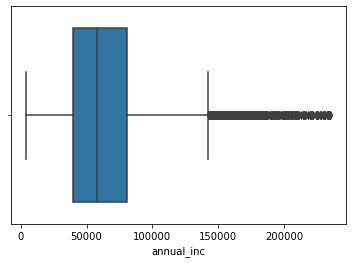

In [105]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

In [106]:
loan_df["annual_inc"].quantile(.95)

135000.0

In [107]:
loan_df = loan_df[loan_df["annual_inc"]<=loan_df["annual_inc"].quantile(.99)]
loan_df.shape

(38928, 39)

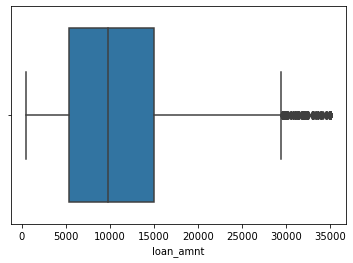

In [108]:
sns.boxplot(loan_df["loan_amnt"])
plt.show()

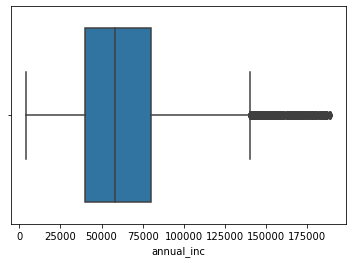

In [109]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

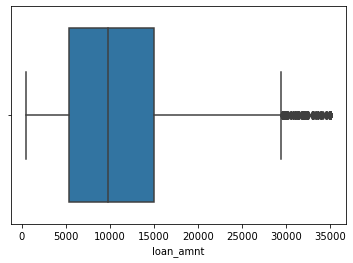

In [110]:
sns.boxplot(loan_df["loan_amnt"])
plt.show()

#### Lets check Loan Status

In [111]:
loan_df["loan_status"].value_counts()/len(loan_df)*100
#around 83% people fully paid the loan , 14% people charged off and around 3% people loan still running

Fully Paid     82.878648
Charged Off    14.254521
Current         2.866831
Name: loan_status, dtype: float64

In [112]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           1           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
4 2011-12-01      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Jan-85               1         3        0      13648        83.7   
1           Apr-99               5         3        0       1687         9.4   
2           Nov-01               2         2        0       2956        98.5   
3           Feb-96               1        10        0       5598        21.0   
4           Jan-96               0        15        0      27783        53.9   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00   5863.155187          5833.84   
1          4       0.00           0.00   1008.710000          1008.71   
2         10       0.00           0.00   3005.666844          3005.67   
3         37       0.00           0.00  12231.890000         12231.89   
4         38     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00   2015-01-01           171.62         2016-05-01   
1                     1.11   2013-04-01           119.66         2013-09-01   
2                     0.00   2014-06-01           649.91         2016-05-01   
3                     0.00   2015-01-01           357.48         2016-04-01   
4                     0.00   2016-05-01            67.79         2016-05-01   

   Issue_year  Issue_month  
0        2011           12  
1        2011           12  
2        2011           12  
3        2011           12  
4        2011           12

#### Lets change issue_d column to date time column because it may use for further analysis

In [113]:
loan_df['issue_d']=pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['last_pymnt_d']=pd.to_datetime(loan_df.last_pymnt_d,format='%b-%y')
loan_df['last_credit_pull_d']=pd.to_datetime(loan_df.last_credit_pull_d,format='%b-%y')
loan_df['Issue_year']=loan_df['issue_d'].dt.year
loan_df['Issue_month']=loan_df['issue_d'].dt.month
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38928 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38928 non-null  int64         
 1   funded_amnt              38928 non-null  int64         
 2   funded_amnt_inv          38928 non-null  float64       
 3   term                     38928 non-null  int64         
 4   int_rate                 38928 non-null  float64       
 5   installment              38928 non-null  float64       
 6   grade                    38928 non-null  object        
 7   sub_grade                38928 non-null  object        
 8   emp_length               38928 non-null  int32         
 9   home_ownership           38928 non-null  object        
 10  annual_inc               38928 non-null  float64       
 11  verification_status      38928 non-null  object        
 12  issue_d                  38928 n

In [114]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           1           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
4 2011-12-01      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Jan-85               1         3        0      13648        83.7   
1           Apr-99               5         3        0       1687         9.4   
2           Nov-01               2         2        0       2956        98.5   
3           Feb-96               1        10        0       5598        21.0   
4           Jan-96               0        15        0      27783        53.9   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00   5863.155187          5833.84   
1          4       0.00           0.00   1008.710000          1008.71   
2         10       0.00           0.00   3005.666844          3005.67   
3         37       0.00           0.00  12231.890000         12231.89   
4         38     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00   2015-01-01           171.62         2016-05-01   
1                     1.11   2013-04-01           119.66         2013-09-01   
2                     0.00   2014-06-01           649.91         2016-05-01   
3                     0.00   2015-01-01           357.48         2016-04-01   
4                     0.00   2016-05-01            67.79         2016-05-01   

   Issue_year  Issue_month  
0        2011           12  
1        2011           12  
2        2011           12  
3        2011           12  
4        2011           12

In [115]:
loan_df["purpose"].value_counts()*100/len(loan_df)
#Maximum people are taking loan for debt_consolidation

debt_consolidation    47.158857
credit_card           12.952117
other                 10.054460
home_improvement       7.282676
major_purchase         5.507604
small_business         4.549425
car                    3.927764
wedding                2.386457
medical                1.723695
moving                 1.471948
vacation               0.971023
house                  0.942766
educational            0.819462
renewable_energy       0.251747
Name: purpose, dtype: float64

#### Univariate analysis

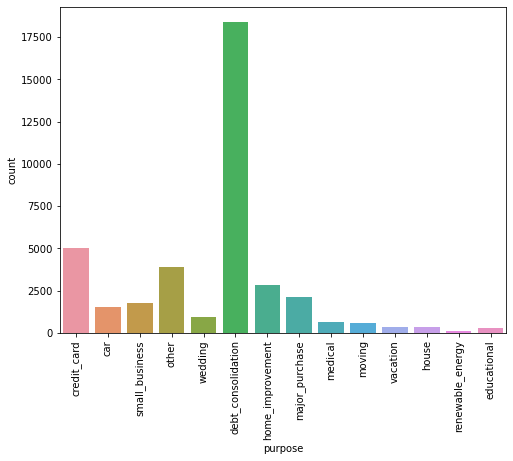

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(loan_df['purpose'])
plt.xticks(rotation=90)
plt.show()
#Maximum people are taking loan for debt_consolidation

#### Lets see interest rate


<AxesSubplot:xlabel='int_rate'>

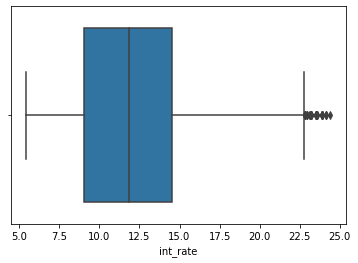

In [117]:
sns.boxplot(loan_df['int_rate'])

In [118]:
#### Lets see correlation between some numeric columns

loan_df_numeric_col=loan_df[["loan_amnt","funded_amnt",'funded_amnt_inv',"term","int_rate","installment","annual_inc","dti","total_pymnt","emp_length"]]

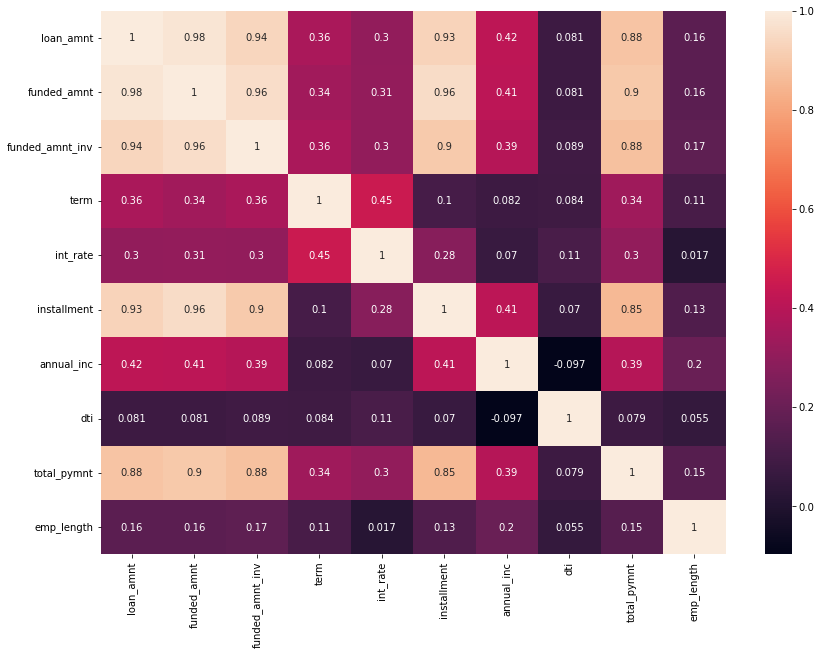

In [119]:
plt.figure(figsize=(14,10))
loan_df_corr=loan_df_numeric_col.corr()
sns.heatmap(loan_df_corr,annot=True)
plt.show()

#Loan amount,Funded_ammount,funded_amount_inv,installment and total amount  have very high positive correlation
#Dti-The debt-to-income ratio (DTI) measures a borrower's debt repayment capacity as per their gross monthly income.
#we can see there is negative correlation between Dti and annual_income hence if annual_inc increase dti decrease and vice versa


#### Univariate analysis